In [1]:
import os
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 100)

In [22]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append("..")

In [3]:
from bbox.connectors import SfMComponents
from bbox.bbox_transformations import bbox_to_global, img_to_global_coord

In [4]:
base_path = "/home/chinmays/Documents/PSI_Research/data/exports/good_data/reference"
connector = SfMComponents(base_path)

In [5]:
camera_label = "DSC05621"
xmin = 1816.
ymin = 1102.
xmax = 1963.
ymax = 1277.

image_width = 4780
image_height = 3184

top_right = [xmax, ymin]
bottom_left = [xmin, ymax]
top_left = [xmin, ymin]
bottom_right = [xmax, ymax]

In [6]:
pixel_height = 0.00753331989370232
pixel_width = 0.00753331989370232
image_width = 4780
image_height = 3184

In [7]:
camera_reference = connector.camera_reference
yaw_angle = float(camera_reference[camera_reference["label"] == camera_label]["Estimated_Yaw"])
focal_length = float(camera_reference[camera_reference["label"] == camera_label]["f"])
camera_height = float(camera_reference[camera_reference["label"] == camera_label]["Estimated_Z"])
camera_x = float(camera_reference[camera_reference["label"] == camera_label]["Estimated_X"])
camera_y = float(camera_reference[camera_reference["label"] == camera_label]["Estimated_Y"])
camera_center = [camera_x, camera_y]

In [62]:
marker_label = "target 1"
gcp_reference = connector.gcp_reference
target_x = float(gcp_reference[gcp_reference["label"] == marker_label]["Reference_X"])
target_y = float(gcp_reference[gcp_reference["label"] == marker_label]["Reference_Y"])
target = np.array([target_x, target_y])

In [9]:
global_coords = bbox_to_global(
    top_left, top_right, bottom_left, bottom_right, 
    camera_center, pixel_width, pixel_height, 
    focal_length, image_width, image_height, 
    camera_height, yaw_angle)

In [10]:
_camera_center = np.array(camera_center)
_image_coordinates = np.array([
    [0., 0.], 
    [0., image_height], 
    [image_width, 0.],
    [image_width, image_height]
])
_image_coordinates1 = np.array([
    [image_width/4, image_height/4], 
    [image_width/4, image_height*(3/4)], 
    [image_width*(3/4), image_height/4],
    [image_width*(3/4), image_height*(3/4)]
])
_image_coordinates2 = np.array([
    [0., 0.], 
    [0, image_height*(1/4)], 
    [image_width*(1/4), 0.],
    [image_width*(1/4), image_height*(1/4)]
])

test_global_coords = img_to_global_coord(
    _image_coordinates, _camera_center, 
    pixel_width, pixel_height, focal_length, 
    image_width, image_height, camera_height, 
    yaw_angle, is_bbox=True
)

test_global_coords1 = img_to_global_coord(
    _image_coordinates1, _camera_center, 
    pixel_width, pixel_height, focal_length, 
    image_width, image_height, camera_height, 
    yaw_angle, is_bbox=True
)
test_global_coords2 = img_to_global_coord(
    _image_coordinates2, _camera_center, 
    pixel_width, pixel_height, focal_length, 
    image_width, image_height, camera_height, 
    yaw_angle, is_bbox=True
)

# global_coordinates[0, :] = top_right
# global_coordinates[1, :] = bottom_left
# global_coordinates[2, :] = top_left
# global_coordinates[3, :] = bottom_right

In [87]:
from matplotlib.patches import Rectangle
def print_coords(global_coords):
    print("Top Left", global_coords[2, :])
    print("Top Right", global_coords[0, :])
    print("Bottom Left", global_coords[1, :])
    print("Bottom Right", global_coords[3, :])

def plot_vertices(coords, ax):
    ax.scatter(coords[2, 0], coords[2, 1], c="r") # Top Left
    ax.scatter(coords[0, 0], coords[0, 1], c="g") # Top Right
    ax.scatter(coords[1, 0], coords[1, 1], c="b") # Bottom Left
    ax.scatter(coords[3, 0], coords[3, 1], c="y") # Bottom Right
    
def plot_rectangle(center, *global_coords, colors=None, targets=[]):
    
    _center = center.flatten()
    f, ax = plt.subplots(1, 1)
    ax.scatter(center[0], center[1], marker="x")
    if targets:
        for target in targets:
            ax.scatter(target[0], target[1], marker="*", c="b")
    for i, global_coord in enumerate(global_coords):
        plot_vertices(global_coord, ax)
        anchor = tuple(global_coord[1, :])
        width = global_coord[0, 0] - global_coord[2, 0]
        height = global_coord[2, 1] - global_coord[1, 1]
        patch = Rectangle(anchor, width, height, facecolor="none", edgecolor=colors[i], linewidth=1)
        ax.add_patch(patch)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.show()
    

In [88]:
print_coords(test_global_coords)
print(test_global_coords - _camera_center)

Top Left [-0.12783624  0.76031103]
Top Right [0.75392047 0.76091498]
Bottom Left [-0.12692956 -0.56343176]
Bottom Right [ 0.75482715 -0.56282782]
[[ 0.44042501  0.66217337]
 [-0.44042501 -0.66217337]
 [-0.44133169  0.66156942]
 [ 0.44133169 -0.66156942]]


In [89]:
print_coords(test_global_coords1)
print(test_global_coords1 - _camera_center)

Top Left [0.09282961 0.42952632]
Top Right [0.53370796 0.42982829]
Bottom Left [ 0.09328295 -0.23234508]
Bottom Right [ 0.5341613 -0.2320431]
[[ 0.22021251  0.33108669]
 [-0.22021251 -0.33108669]
 [-0.22066585  0.33078471]
 [ 0.22066585 -0.33078471]]


In [90]:
print_coords(test_global_coords2)
print(test_global_coords2 - _camera_center)

Top Left [-0.12783624  0.76031103]
Top Right [0.09260294 0.76046202]
Bottom Left [-0.12760957  0.42937533]
Bottom Right [0.09282961 0.42952632]
[[-0.22089252  0.66172041]
 [-0.44110502  0.33063373]
 [-0.44133169  0.66156942]
 [-0.22066585  0.33078471]]


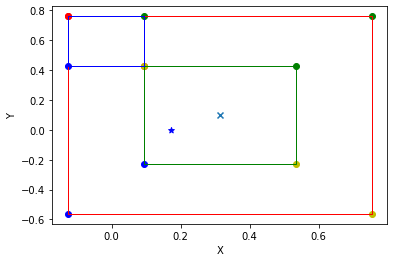

In [91]:
plot_rectangle(_camera_center, test_global_coords, test_global_coords1, test_global_coords2, colors=["r", "g", "b"], targets=[target])

In [65]:
# print(0.75392047 + 0.12692956)
# print(0.53370796 - 0.09328295)

In [66]:
# print(0.76091498 + 0.56343176)
# print(0.42982829 + 0.23234508)

In [79]:
xmin = 1816.
ymin = image_height - 1102.
xmax = 1963.
ymax = image_height - 1277.

top_right = [xmax, ymax]
bottom_left = [xmin, ymin]
top_left = [xmin, ymax]
bottom_right = [xmax, ymin]

_image_coordinates = np.array([
    top_right, bottom_left, top_left, bottom_right
])
bbox_global_coords = img_to_global_coord(
    _image_coordinates, _camera_center, 
    pixel_width, pixel_height, focal_length, 
    image_width, image_height, camera_height, 
    yaw_angle, is_bbox=True
)

In [80]:
bbox_global_coords

array([[0.44908406, 0.25779446],
       [0.40064856, 0.21705202],
       [0.40062067, 0.25776127],
       [0.44911194, 0.21708522]])

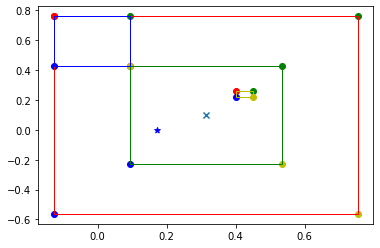

In [86]:
plot_rectangle(_camera_center, test_global_coords, test_global_coords1, test_global_coords2, bbox_global_coords, colors=["r", "g", "b", "y"], targets=[target])

In [26]:
print("Top Left", global_coords[2, :])
print("Top Right", global_coords[0, :])
print("Bottom Left", global_coords[1, :])
print("Bottom Right", global_coords[3, :])
print(f"Target x: {target_x}, Target y: {target_y}")

Top Left [0.40062067 0.25776127]
Top Right [0.44908406 0.25779446]
Bottom Left [0.40064856 0.21705202]
Bottom Right [0.44911194 0.21708522]
Target x: 0.173, Target y: 0.0


In [13]:
gcp_reference

,Reference_Y,Reference_Z,Estimated_Z,Detected,label,Error_Y,Estimated_X,Reference_X,Variance_X,Variance_Y,Estimated_Y,Error_Z,Variance_Z,Error_X
0,0.000,0.0,-0.000030,True,target 1,0.000448,0.172907,0.173,0.000582,0.000582,0.000448,-0.000030,0.000660,-0.000093
1,0.000,0.0,-0.001348,True,target 2,0.000331,1.242109,1.242,0.000445,0.000446,0.000331,-0.001348,0.000543,0.000109
2,0.000,0.0,0.000129,True,target 3,0.000732,2.473144,2.473,0.000355,0.000357,0.000732,0.000129,0.000487,0.000144
3,0.000,0.0,-0.000140,True,target 4,-0.000187,3.689941,3.689,0.000387,0.000389,-0.000187,-0.000140,0.000525,0.000941
4,0.000,0.0,0.001389,True,target 5,0.000923,5.414677,5.414,0.000586,0.000588,0.000923,0.001389,0.000710,0.000677
5,0.906,0.0,0.000489,True,target 6,0.000097,0.078940,0.079,0.000596,0.000596,0.906097,0.000489,0.000720,-0.000060
6,0.906,0.0,0.001615,True,target 7,-0.001109,1.854457,1.855,0.000388,0.000389,0.904891,0.001615,0.000525,-0.000543
7,0.906,0.0,-0.001263,True,target 8,-0.000343,3.129391,3.130,0.000357,0.000359,0.905657,-0.001263,0.000487,-0.000609
8,0.906,0.0,0.000199,True,target 9,0.000298,4.359634,4.360,0.000449,0.000451,0.906298,0.000199,0.000547,-0.000366
9,0.906,0.0,-0.001041,True,target 10,-0.001190,5.373799,5.374,0.000580,0.000581,0.904810,-0.001041,0.000658,-0.000201


In [17]:
base_path = "/home/chinmays/Documents/PSI_Research/data/exports/good_data/circular_12bit_referenced_dataset/"

In [18]:
img = cv2.imread(base_path + camera_label + ".jpg")

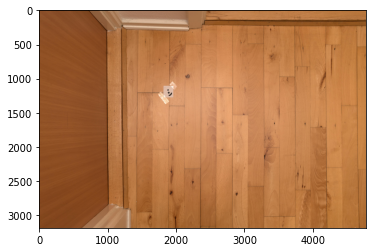

In [20]:
plt.imshow(img[:, :, ::-1])

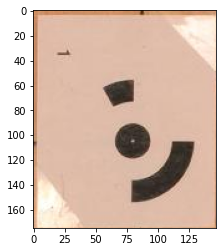

In [22]:
xmin = 1816
ymin = 1102
xmax = 1963
ymax = 1277

plt.imshow(img[ymin:ymax, xmin:xmax, ::-1])